<a href="https://colab.research.google.com/github/ashwith-nagendra/IIITH-AIML/blob/main/AIML_Tutorial_Training_a_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import random

In [2]:
# load the dataset

iris = load_iris()
data, labels = iris.data[:,0:2], iris.data[:,2]

num_samples = len(labels)  # size of our dataset

# shuffle the dataset
shuffle_order = np.random.permutation(num_samples)
data = data[shuffle_order, :]
labels = labels[shuffle_order]

In [4]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

# set our paramters - weights and bias
w = [0.1, 0.5]
b = -0.3

# for example, let's use the first data point
X, y = data, labels

pred_y = [weighted_sum(x, w, b) for x in X]

# let's print out the first prediction
print("for x=[%0.2f, %0.2f], predicted = %0.2f, actual = %0.2f" % (X[0][0], X[0][1], pred_y[0], y[0]))

for x=[5.70, 2.60], predicted = 1.57, actual = 3.50


In [5]:
# sum squared error
def cost_function(y_pred, y_actual):
    return 0.5 * np.sum((y_actual-y_pred)**2)

error = cost_function(pred_y, y)
print(error)

525.1947499999999


In [6]:
# normalizing the data
X = X / np.amax(X, axis=0)
y = y / np.amax(y, axis=0)

# randomly initializing w, b
w, b = [random.random(), random.random()], random.random()

# our function w*x + b
def F(X, w, b):
    return np.sum(w*X, axis=1) + b

# calculating error using cost function(Here we use Mean Squared Error)
y_pred = F(X, w, b)
init_cost = cost_function(y_pred, y)

print("initial parameters: w1=%0.3f, w2=%0.3f, b=%0.3f"%(w[0], w[1], b))
print("initial cost = %0.3f" % init_cost)

initial parameters: w1=0.794, w2=0.540, b=0.537
initial cost = 72.063


In [7]:
# implement partial derivatives of our parameters

def dJdw1(X, y, w, b):
    return -np.dot(X[:,0], y - F(X, w, b))

def dJdw2(X, y, w, b):
    return -np.dot(X[:,1], y - F(X, w, b))

def dJdb(X, y, w, b):
    return -np.sum(y - F(X, w, b))

In [8]:
# choose the learning rate parameter and number of iterations
lr = 0.001
n_iters = 1000

# run through gradient descent
errors = []
for i in range(n_iters):
    w[0] = w[0] - lr * dJdw1(X, y, w, b)
    w[1] = w[1] - lr * dJdw2(X, y, w, b)
    b = b - lr * dJdb(X, y, w, b)
    y_pred = F(X, w, b)
    j = cost_function(y_pred, y)
    errors.append(j)

Text(0.5, 0, 'iterations')

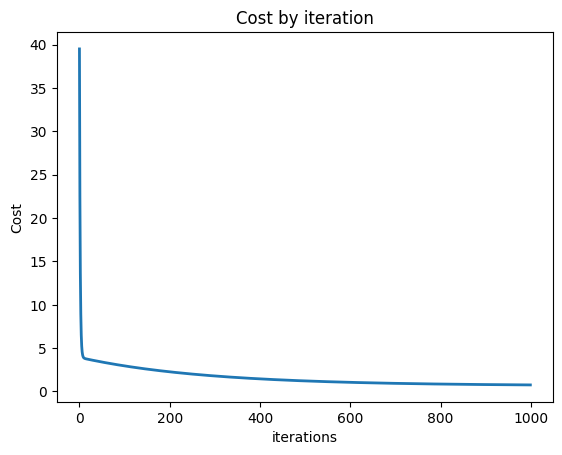

In [9]:
# plot the error
plt.plot(range(n_iters), errors, linewidth=2)
plt.title("Cost by iteration")
plt.ylabel("Cost")
plt.xlabel("iterations")

In [10]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

In [11]:
def weighted_sum(x, w, b):
    return b + np.dot(w, x)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# our parameters
w = [0.2, 0.6]
b = -0.3

X, y = data, labels

# get weighted sum like before
Z = [weighted_sum(x, w, b) for x in X]

# now transform the weighted sums with a sigmoid
y_pred = [sigmoid(z) for z in Z]

# evaluate error
error = cost_function(y_pred, y)
print(error)

829.3581552057612


In [12]:
W1 = np.random.randn(2, 3)
W2 = np.random.randn(3, 1)

print("W1=", W1)
print("W2=", W2)

W1= [[ 0.01252547  0.2749683   0.01770429]
 [-1.58670853  0.10328242  0.48443554]]
W2= [[0.48097636]
 [0.58583859]
 [0.55090108]]


In [13]:

X, y = data, labels

# first layer weighted sum z
z = np.dot(X, W1)

# project z through non-linear sigmoid
z = sigmoid(z)

# do another dot product at end (sigmoid is omitted)
y_pred = np.dot(z, W2)

# what is our cost
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 1.57 for example 0, actual 3.50, total cost 122218.21


In [14]:
class Neural_Network(object):
    def __init__(self, n0, n1, n2):
        self.n0 = n0
        self.n1 = n1
        self.n2 = n2

        # initialize weights
        self.W1 = np.random.randn(self.n0, self.n1)
        self.W2 = np.random.randn(self.n1 ,self.n2)

    def predict(self, x):
        z = np.dot(x, self.W1)
        z = sigmoid(z)
        y = np.dot(z, self.W2)
        return y


In [15]:
# instantiate a neural network with 2 input neurons, 3 hidden neurons, and 1 output neuron using above class

net = Neural_Network(2, 3, 1)

In [16]:
X, y = data, labels
y_pred = net.predict(X)
error = cost_function(y_pred, y)

print('predicted %0.2f for example 0, actual %0.2f, total cost %0.2f'%(pred_y[0], y[0], error))

predicted 1.57 for example 0, actual 3.50, total cost 173827.94


In [17]:
def get_gradient(net, X, y):
    w_delta = 1e-8

    # get the current value of the loss, wherever the parameters are
    y_pred_current = net.predict(X)
    error_current = cost_function(y_pred_current, y)

    # grab the current weights and copy them (so we can restore them after modification)
    dw1, dw2 = np.zeros((net.n0, net.n1)), np.zeros((net.n1, net.n2))
    W1, W2 = np.copy(net.W1), np.copy(net.W2)

    # Calculate gradient for the first layer
    for i in range(net.n0):
        for j in range(net.n1):
            net.W1 = np.copy(W1)
            net.W1[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw1[i][j] = (error - error_current) / w_delta

    # Calculate gradient for the second layer
    for i in range(net.n1):
        for j in range(net.n2):
            net.W2 = np.copy(W2)
            net.W2[i][j] += w_delta
            y_pred = net.predict(X)
            error = cost_function(y_pred, y)
            dw2[i][j] = (error - error_current) / w_delta

    # restore the original weights
    net.W1, net.W2 = np.copy(W1), np.copy(W2)

    return dw1, dw2

In [20]:
# load the data and labels
X, y = data, labels.reshape((len(labels),1))

# it's always a good idea to normalize the data between 0 and 1
X = X/np.amax(X, axis=0)
y = y/np.amax(y, axis=0)

# create a 2x3x1 neural net
net = Neural_Network(2, 3, 1)

# what is the current cost?
y_orig = net.predict(X)
init_cost = cost_function(y_orig, y)
print("initial cost = %0.3f" % init_cost)

# Set the learning rate, and how many epochs (updates) to try
n_epochs = 1000
learning_rate = 0.01

# for each epoch, calculate the gradient, then subtract it from the parameters, and save the cost
errors = []
for i in range(n_epochs):
    dw1, dw2 = get_gradient(net, X, y)
    net.W1 = net.W1 - learning_rate * dw1
    net.W2 = net.W2 - learning_rate * dw2
    y_pred = net.predict(X)
    error = cost_function(y_pred, y)
    errors.append(error)

initial cost = 53.873


Text(0, 0.5, 'Error')

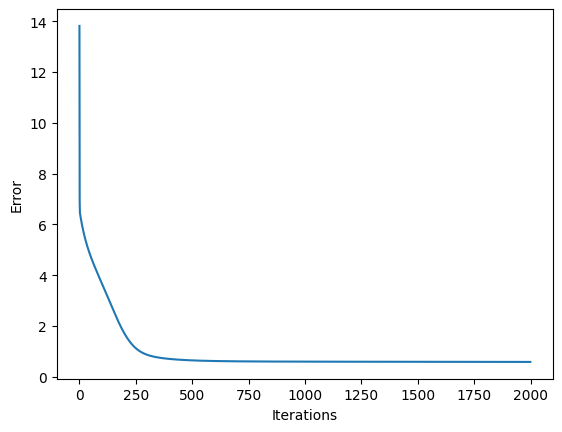

In [19]:
# plotting iterations vs error
plt.plot(range(0, len(errors)), errors)
plt.xlabel('Iterations')
plt.ylabel('Error')